지난주 내용

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
prm_c = [170, 108, 0.2]
T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5.data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2*s**2))

def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y=y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:,j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, 'r-', linewidth = 3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, T')

홀드아웃 검증

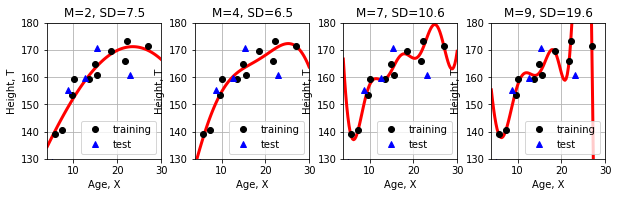

In [49]:
X_test = X[:int(X_n/4+1)] # X]0]~X[4]를 X_test에 입력
T_test = T[:int(X_n/4+1)] 
X_train = X[int(X_n/4+1):] # X[5]~X[15]를 X_train에 입력
T_train = T[int(X_n/4+1):]

plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i+1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, 'ko', label='training')
    plt.plot(X_test, T_test, 'b^', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()
    

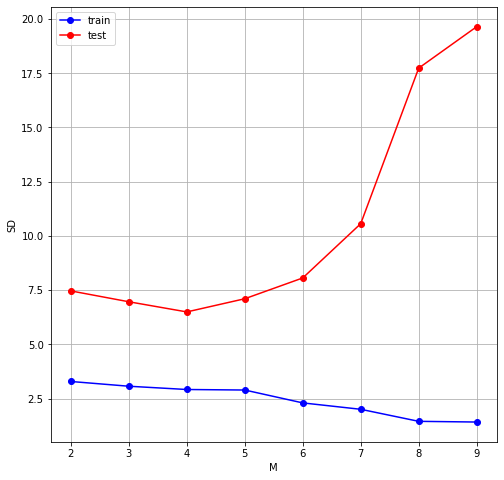

In [50]:
plt.figure(figsize=(8, 8))
M=range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
    
plt.plot(M, mse_train, 'b-o', label = 'train')
plt.plot(M, mse_test, 'r-o', label = 'test')
plt.legend(loc='upper left', fontsize = 10)
plt.xlabel('M')
plt.ylabel('SD')
plt.grid(True)
plt.show()

교차검층

In [51]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] # 나머지 연산자 이용
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

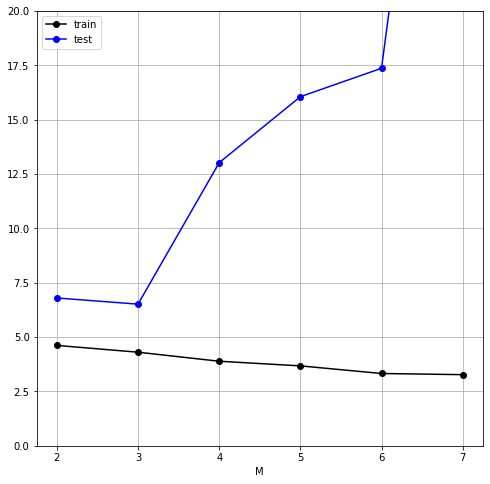

In [52]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i] , Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], 16)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(8, 8))
plt.plot(M, mean_Gauss_train, 'k-o', label='train')
plt.plot(M, mean_Gauss_test, 'b-o', label='test')
plt.legend(loc='upper left')
plt.ylim(0, 20)
plt.grid(True)
plt.xlabel('M')
plt.show()

W=[ 344.8   -6.3  366.2 -259. ]
SD=4.37 cm


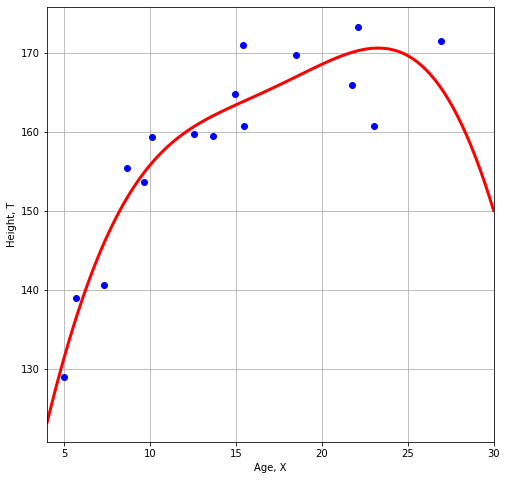

In [53]:
M=3

plt.figure(figsize=(8, 8))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

In [54]:
def model_A(x, w):
    y = w[0] - w[1]*np.exp(-w[2]*x)
    return y

def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y)
    
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

from scipy.optimize import minimize

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args = (x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2 = 0.2
SD=3.86 cm


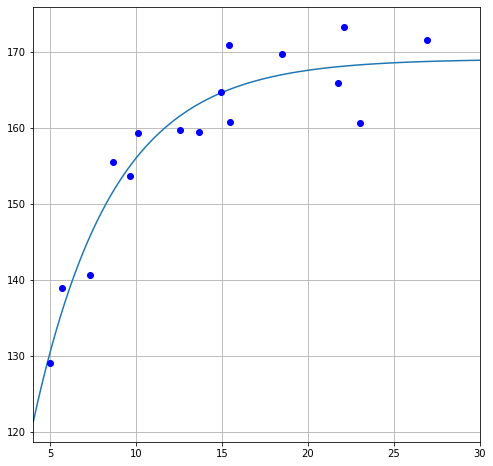

In [55]:
plt.figure(figsize=(8, 8))
W_init = [100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M=3)  SD = 6.51cm
Model A SD = 4.72cm


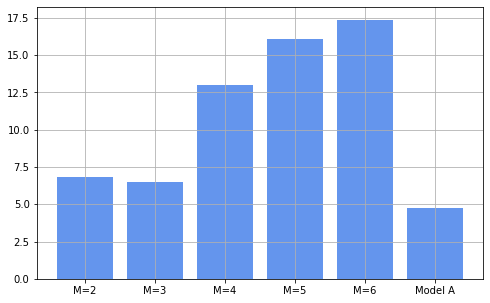

In [59]:
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

K=16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3)  SD = {0:.2f}cm".format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f}cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]

plt.figure(figsize=(8, 5))
plt.bar(M, SD, tick_label = label, align = "center", facecolor = "cornflowerblue")
plt.grid(True)
plt.show()
       